In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train_intro.csv')
df.head()

,Unnamed: 0,Stock1,Stock2,Stock3,Stock4,Stock1_Delay,Stock2_Delay,Stock3_Delay,Stock4_Delay
0,0,1479.36,1088.26,1545.61,1304.27,1481.40,1094.60,1546.06,1347.49
1,1,1479.33,1087.03,1544.94,1305.82,1479.36,1088.26,1545.61,1304.27
2,2,1479.72,1087.16,1543.55,1287.43,1479.33,1087.03,1544.94,1305.82
3,3,1477.47,1077.92,1545.35,1193.67,1479.72,1087.16,1543.55,1287.43
4,4,1474.91,1076.45,1545.01,1296.92,1477.47,1077.92,1545.35,1193.67


In [3]:
# add returns columns for each stock
for stock in ['Stock1', 'Stock2', 'Stock3', 'Stock4', 'Stock1_Delay', 'Stock2_Delay', 'Stock3_Delay', 'Stock4_Delay']:
    df[stock + '_Return'] = df[stock].pct_change()


# # IMPORTANT: Shift non-delayed returns forward by 1 day (model the 1-delay)
# df['Stock1_Return'] = df['Stock1_Return'].shift(-1)
# df['Stock2_Return'] = df['Stock2_Return'].shift(-1)
# df['Stock3_Return'] = df['Stock3_Return'].shift(-1)
# df['Stock4_Return'] = df['Stock4_Return'].shift(-1)

df.replace(np.nan, 0, inplace=True)

df.head()

,Unnamed: 0,Stock1,Stock2,Stock3,Stock4,Stock1_Delay,Stock2_Delay,Stock3_Delay,Stock4_Delay,Stock1_Return,Stock2_Return,Stock3_Return,Stock4_Return,Stock1_Delay_Return,Stock2_Delay_Return,Stock3_Delay_Return,Stock4_Delay_Return
0,0,1479.36,1088.26,1545.61,1304.27,1481.40,1094.60,1546.06,1347.49,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,1479.33,1087.03,1544.94,1305.82,1479.36,1088.26,1545.61,1304.27,-0.000020,-0.001130,-0.000433,0.001188,-0.001377,-0.005792,-0.000291,-0.032074
2,2,1479.72,1087.16,1543.55,1287.43,1479.33,1087.03,1544.94,1305.82,0.000264,0.000120,-0.000900,-0.014083,-0.000020,-0.001130,-0.000433,0.001188
3,3,1477.47,1077.92,1545.35,1193.67,1479.72,1087.16,1543.55,1287.43,-0.001521,-0.008499,0.001166,-0.072827,0.000264,0.000120,-0.000900,-0.014083
4,4,1474.91,1076.45,1545.01,1296.92,1477.47,1077.92,1545.35,1193.67,-0.001733,-0.001364,-0.000220,0.086498,-0.001521,-0.008499,0.001166,-0.072827


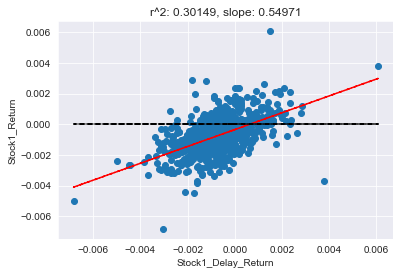

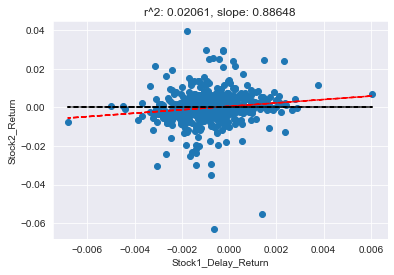

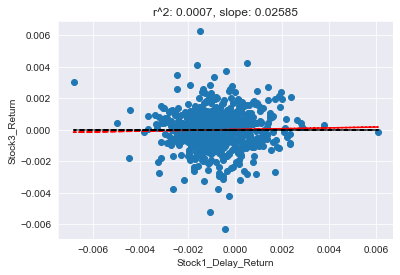

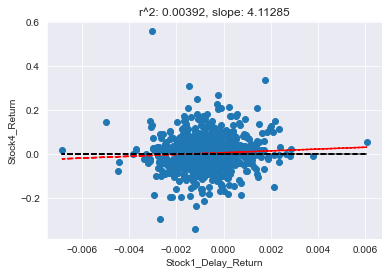

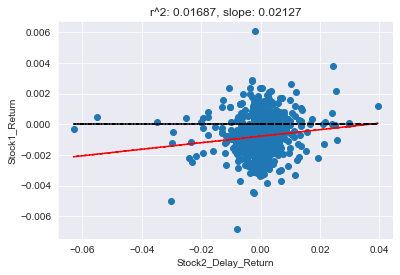

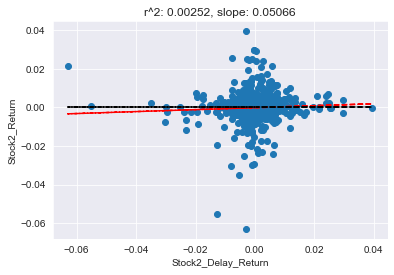

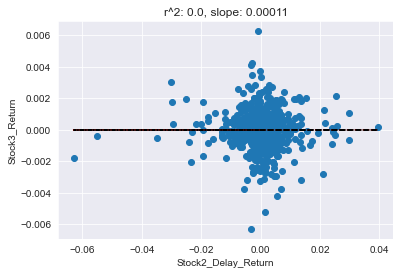

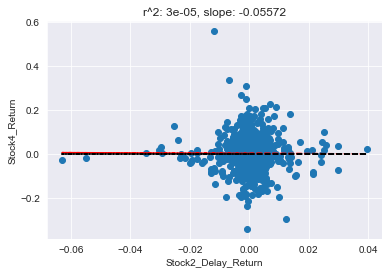

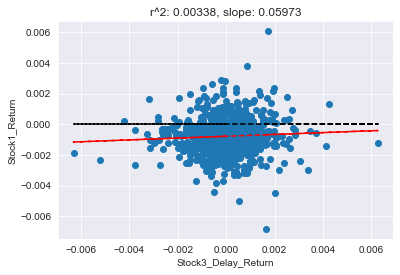

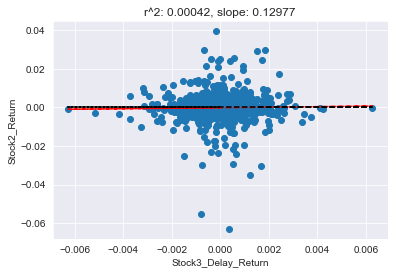

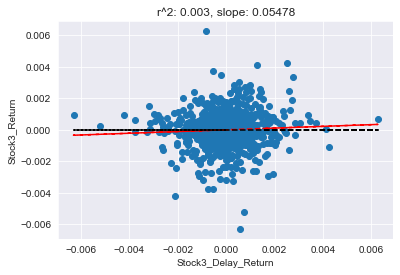

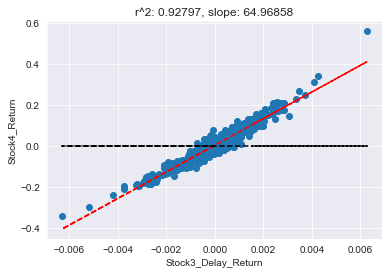

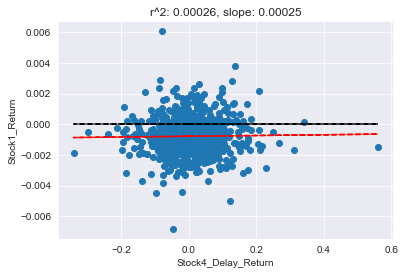

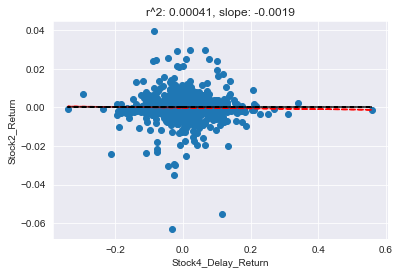

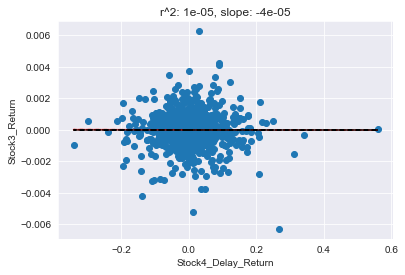

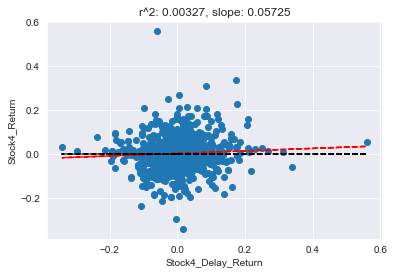

In [4]:
import matplotlib.pyplot as plt

for stock1 in ['Stock1_Delay_Return', 'Stock2_Delay_Return', 'Stock3_Delay_Return', 'Stock4_Delay_Return']:
    for stock2 in ['Stock1_Return', 'Stock2_Return', 'Stock3_Return', 'Stock4_Return']:
        if stock1 != stock2:
            # # drop outliers
            # df = df[(np.abs(df[stock1] - df[stock1].mean()) <= (3 * df[stock1].std()))]
            # df = df[(np.abs(df[stock2] - df[stock2].mean()) <= (3 * df[stock2].std()))]
            # plot
            plt.scatter(df[stock1], df[stock2])
            plt.xlabel(stock1)
            plt.ylabel(stock2)
            # trend-line
            z = np.polyfit(df[stock1], df[stock2], 1)
            p = np.poly1d(z)
            plt.plot(df[stock1],p(df[stock1]),"r--")
            # plot line at y=0
            plt.plot(df[stock1], [0 for i in range(len(df[stock1]))], 'k--')
            # set title to r^2 value, slope
            plt.title(f'r^2: {round(np.corrcoef(df[stock1], df[stock2])[0, 1] ** 2, 5)}, slope: {round(z[0], 5)}')
            # save graph
            plt.savefig(f'plots/{stock1}_{stock2} .png')
            # export line model

        plt.show()


In [5]:
# for use in trader class, export trendlines for each stock
for stock1 in ['Stock1_Delay_Return', 'Stock2_Delay_Return', 'Stock3_Delay_Return', 'Stock4_Delay_Return']:
    for stock2 in ['Stock1_Return', 'Stock2_Return', 'Stock3_Return', 'Stock4_Return']:
        if stock1 != stock2:
            # trend-line
            z = np.polyfit(df[stock1], df[stock2], 1)
            p = np.poly1d(z)
            # export line model
            np.savetxt(f'lines/{stock1}_{stock2}.txt', z)


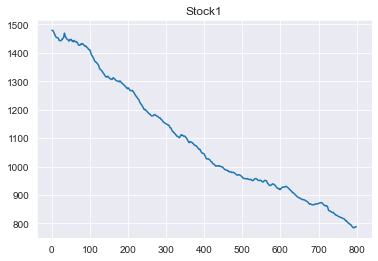

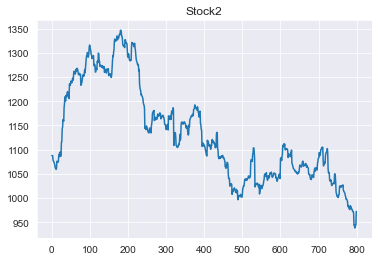

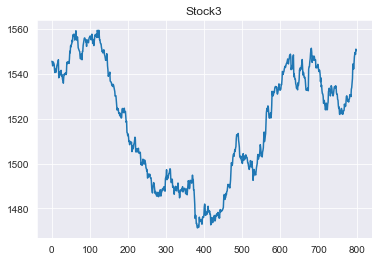

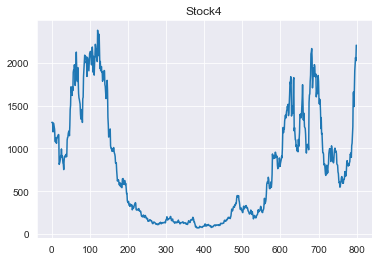

In [6]:
# plot each stock along time
for stock in ['Stock1', 'Stock2', 'Stock3', 'Stock4']:
    plt.plot(df[stock])
    plt.title(stock)
    plt.show()

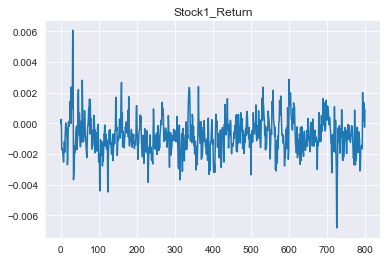

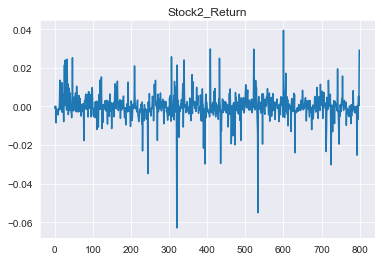

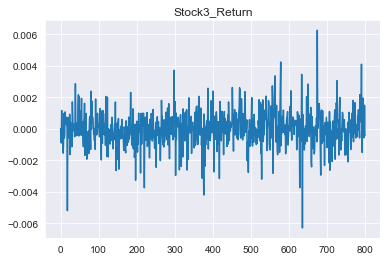

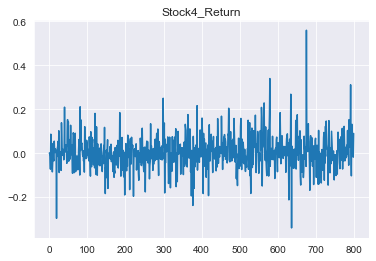

In [7]:
# plot each stock's return along time
for stock in ['Stock1_Return', 'Stock2_Return', 'Stock3_Return', 'Stock4_Return']:
    plt.plot(df[stock])
    plt.title(stock)
    plt.show()

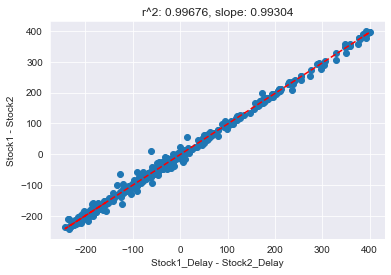

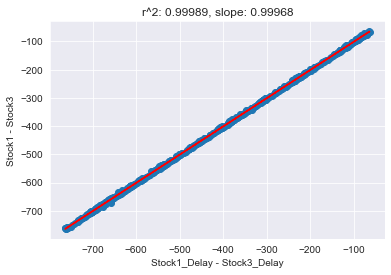

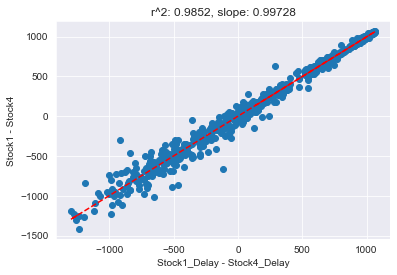

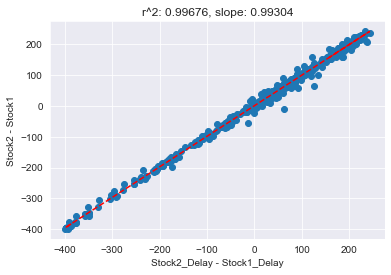

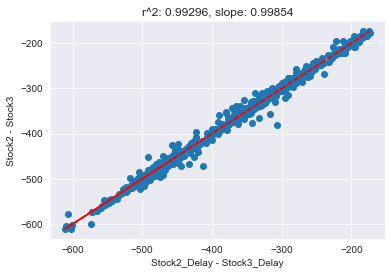

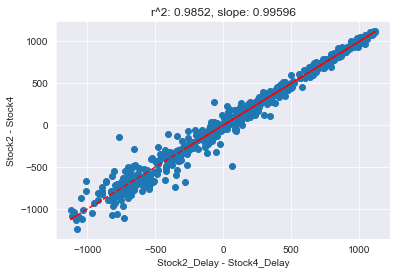

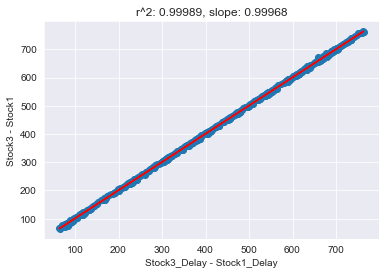

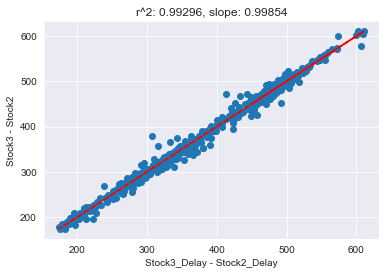

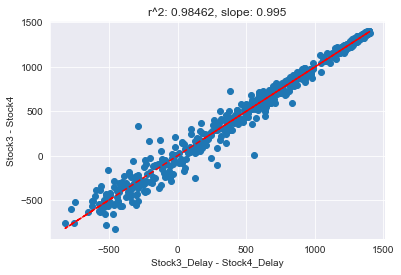

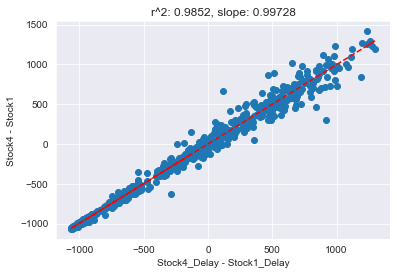

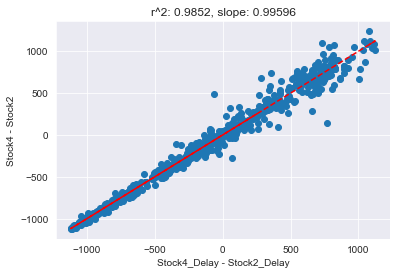

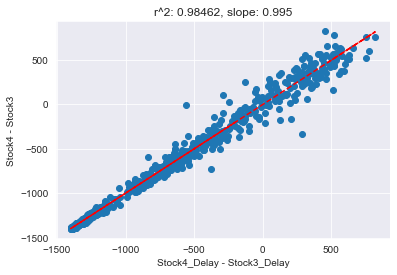

In [8]:
# check for mean reversion with the stock differences (stock1 - stock2) vs. delayed difference
for stock1 in ['Stock1', 'Stock2', 'Stock3', 'Stock4']:
    for stock2 in ['Stock1', 'Stock2', 'Stock3', 'Stock4']:
        if stock1 != stock2:
            # plot
            plt.scatter(df[stock1 + '_Delay'] - df[stock2 + '_Delay'], df[stock1] - df[stock2])
            plt.xlabel(stock1 + '_Delay - ' + stock2 + '_Delay')
            plt.ylabel(stock1 + ' - ' + stock2)
            # trend-line
            z = np.polyfit(df[stock1 + '_Delay'] - df[stock2 + '_Delay'], df[stock1] - df[stock2], 1)
            p = np.poly1d(z)
            plt.plot(df[stock1 + '_Delay'] - df[stock2 + '_Delay'],p(df[stock1 + '_Delay'] - df[stock2 + '_Delay']),"r--")
            # set title to r^2 value, slope
            plt.title(f'r^2: {round(np.corrcoef(df[stock1 + "_Delay"] - df[stock2 + "_Delay"], df[stock1] - df[stock2])[0, 1] ** 2, 5)}, slope: {round(z[0], 5)}')
        plt.show()

All slopes are roughly 1, so no mean reversion found...

In [9]:
from sklearn.model_selection import train_test_split

# 1 deg polynomial for stock 1, 2, 3, 4 onto each other
poly = PolynomialFeatures(degree=1)

# test each of the 3 stocks to predict the last one
delays = ['Stock1_Delay_Return', 'Stock2_Delay_Return', 'Stock3_Delay_Return', 'Stock4_Delay_Return']
labels = ['Stock1_Return', 'Stock2_Return', 'Stock3_Return', 'Stock4_Return']
for to_remove in range(len(delays)):
    X = poly.fit_transform(df[[delays[i] for i in range(len(delays)) if i != to_remove]])
    y = df[labels[to_remove]]
    X_train, X_test = train_test_split(X, test_size=0.2)
    y_train, y_test = train_test_split(y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    print(f'Stock {to_remove + 1}:', model.score(X_train, y_train))
    print(f'Coefficients: {model.coef_}')

Stock 1: 0.0006522718978713149
Coefficients: [ 0.00000000e+00  3.17821843e-03 -1.89005165e-02 -2.01187421e-05]
Stock 2: 0.00807304959540045
Coefficients: [ 0.         -0.03385581  0.19378815  0.00764941]
Stock 3: 0.001999585574776974
Coefficients: [ 0.00000000e+00  4.92461378e-06  6.98079784e-03 -2.75168571e-04]
Stock 4: 0.0047038332314477405
Coefficients: [ 0.         -2.81157483 -0.33764848 -2.32955265]


In [10]:
# linear/polynomial models seem useless... let's try a random forest regressor

In [11]:
from sklearn.model_selection import train_test_split
# now do the exact same experiment but with a randon forest regressor
from sklearn.ensemble import RandomForestRegressor

# test each of the 3 stocks to predict the last one
delays = ['Stock1_Delay_Return', 'Stock2_Delay_Return', 'Stock3_Delay_Return', 'Stock4_Delay_Return']
labels = ['Stock1_Return', 'Stock2_Return', 'Stock3_Return', 'Stock4_Return']
for to_remove in range(len(delays)):
    # test train split
    X = df[[delays[i] for i in range(len(delays)) if i != to_remove]]
    X_train, X_test = train_test_split(X, test_size=0.2)
    y_train, y_test = train_test_split(df[labels[to_remove]], test_size=0.2)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    print(f'Stock {to_remove + 1}:', model.score(X_test, y_test))
    print(f'Feature importances: {model.feature_importances_}')



Stock 1: -0.13012951343146129
Feature importances: [0.33927575 0.32554725 0.33517699]
Stock 2: -0.11914632587770368
Feature importances: [0.3110741  0.37045607 0.31846983]
Stock 3: -0.2741083281346315
Feature importances: [0.32732147 0.35588149 0.31679704]
Stock 4: -0.200093303507328
Feature importances: [0.33193787 0.34423482 0.32382731]


In [12]:
# not any better

# old code to save forest:
# import pickle
# for to_remove in range(len(delays)):
#     X = df[[delays[i] for i in range(len(delays)) if i != to_remove]]
#     y = df[labels[to_remove]]
#     model = RandomForestRegressor()
#     model.fit(X, y)
#     filename = f'finalized_model{to_remove + 1}.sav'
#     pickle.dump(model, open(filename, 'wb'))

# load model - usage
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)


In [13]:
# make pairplot of features
import seaborn as sns
# sns.pairplot(df[['Stock1_Delay_Return', 'Stock2_Delay_Return', 'Stock3_Delay_Return', 'Stock4_Delay_Return', 'Stock1_Return', 'Stock2_Return', 'Stock3_Return', 'Stock4_Return']])
# plt.show()



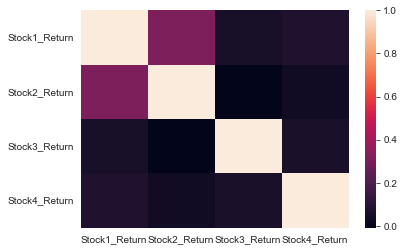

In [14]:



#find correlations between stocks
corr = df[['Stock1_Return', 'Stock2_Return', 'Stock3_Return', 'Stock4_Return']].corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [15]:
# make graph to show how much each stock is correlated with the others and delayed data
# https://stackoverflow.com/questions/20224526/how-to-extract-the-diagonal-and-off-diagonal-part-of-a-matrix-in-numpy
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

corr = df[['Stock1_Return', 'Stock2_Return', 'Stock3_Return', 'Stock4_Return']].corr()
corr = np.triu(corr)
corr = np.abs(corr)
corr = corr[corr != 0]
corr = corr[~np.isnan(corr)]
corr = corr[corr != 1]
corr = pd.DataFrame(corr)
corr = corr.sort_values(by=0, ascending=False)
corr = corr.rename(columns={0: 'corr'})
corr = corr.reset_index()
corr = corr.rename(columns={'index': 'pair'})
print(corr)

corr = df[['Stock1_Delay_Return', 'Stock2_Delay_Return', 'Stock3_Delay_Return', 'Stock4_Delay_Return']].corr()
corr = np.triu(corr)
corr = np.abs(corr)
corr = corr[corr != 0]
corr = corr[~np.isnan(corr)]
corr = corr[corr != 1]
corr = pd.DataFrame(corr)
corr = corr.sort_values(by=0, ascending=False)
corr = corr.rename(columns={0: 'corr'})
corr = corr.reset_index()
corr = corr.rename(columns={'index': 'pair'})
print(corr)

   pair      corr
0     0  0.312384
1     2  0.074108
2     5  0.059027
3     1  0.055727
4     4  0.036754
5     3  0.009530
   pair      corr
0     0  0.309000
1     2  0.072508
2     5  0.059755
3     1  0.056644
4     4  0.031846
5     3  0.007412


In [16]:
#predict  stock 1 with stock 2, 3, 4
from sklearn.model_selection import train_test_split

poly = PolynomialFeatures(degree=1)
delays = ['Stock2_Delay_Return', 'Stock3_Delay_Return', 'Stock4_Delay_Return']
X = poly.fit_transform(df[delays])
y = df['Stock1_Return']
X_train, X_test = train_test_split(X, test_size=0.2)
y_train, y_test = train_test_split(y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print(f'Stock 1:', model.score(X_train, y_train))
print(f'Coefficients: {model.coef_}')



Stock 1: 0.001461191683469254
Coefficients: [ 0.          0.00558992  0.00660819 -0.0001951 ]


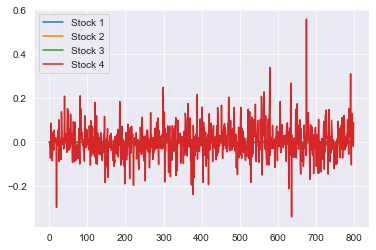

In [17]:
#plot stocks over time
plt.plot(df['Stock1_Return'], label='Stock 1')



plt.plot(df['Stock2_Return'], label='Stock 2')
plt.plot(df['Stock3_Return'], label='Stock 3')
plt.plot(df['Stock4_Return'], label='Stock 4')
plt.legend()
plt.show()


#perform  trading strategy analysis on the stocks

# https://www.quantstart.com/articles/Backtesting-a-Trading-Strategy-with-Pandas-DataFrames
